# Sistem Rekomendasi Film dengan TensorFlow
source: https://www.youtube.com/watch?v=6N2vo3JZg2c&list=PL3VpLbLyLE56IVsWwn_rlv9IGGNiyab9e&t=4127s

tahap dalam pembuatan sistem rekomendasi film:
1. Load dataset
2. Pisah data (train dan test)
3. Membuat model
4. Training model

### Import library untuk dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import(load) dataset

In [2]:
ratings = pd.read_csv('ratings.csv')
#df1 = pd.read_csv('ratings.csv')
ratings.sample(20)

,movie_id,user_id,user_rating
21926,274,634,3.0
54889,1030,318,2.0
71292,1314,276,3.0
25703,642,833,3.0
23073,19,725,5.0
87462,268,561,3.0
94069,892,100,2.0
2786,820,927,4.0
24917,625,452,3.0
29789,749,661,2.0


In [3]:
#df1[df1['user_id'] == 1]

In [4]:
movies = pd.read_csv('movies.csv')
#df2 = pd.read_csv('movies.csv')
movies.sample(20)

,movie_id,movie_title,movie_genres_str
214,215,Field of Dreams (1989),['Documentary']
1465,1466,Margaret's Museum (1995),['Documentary']
1228,1229,Poison Ivy II (1995),"['Documentary', 'Thriller']"
664,665,Alien 3 (1992),"['unknown', 'Film-Noir', 'Sci-Fi', 'Thriller']"
863,864,My Fellow Americans (1996),"[""Children's""]"
399,400,"Little Rascals, The (1994)","['Animation', ""Children's""]"
748,749,"MatchMaker, The (1997)","[""Children's"", 'Romance']"
1521,1522,Trial by Jury (1994),['Thriller']
1280,1281,Manny & Lo (1996),['Documentary']
1558,1559,Hostile Intentions (1994),"['unknown', 'Documentary', 'Thriller']"


In [5]:
jml_movie = movies['movie_id'].nunique()
print("jumlah film:", jml_movie)

jumlah film: 1682


In [6]:
jml_user = ratings['user_id'].nunique()
print("jumlah user:", jml_user)

jumlah user: 943


### Pisah data (train dan test)

In [7]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(ratings, test_size=0.2)

In [8]:
print("jumlah data train:", data_train.shape)
print("jumlah data test :", data_test.shape)

jumlah data train: (80000, 3)
jumlah data test : (20000, 3)


In [9]:
data_train

,movie_id,user_id,user_rating
85490,97,721,4.0
96483,28,897,4.0
29552,815,595,3.0
19305,412,378,2.0
25247,275,136,4.0
...,...,...,...
89495,602,847,3.0
37598,235,658,2.0
35318,871,87,4.0
79368,798,130,1.0


In [10]:
data_test

,movie_id,user_id,user_rating
6705,302,360,4.0
11214,1263,436,3.0
91265,321,803,4.0
36188,382,909,5.0
11561,272,215,3.0
...,...,...,...
35989,676,663,3.0
93041,554,328,3.0
67030,222,490,3.0
77129,1010,363,4.0


### Membuat Model

dalam tensorflow model terdapat input layer, hidden layer, dan output layer

data masuk ke input layer, kemudian diolah oleh hidden layer, dan hasilnya akan keluar dari output layer

hasil yang dikeluarkan oleh output layer adalah nilai prediksi

In [11]:
#import tensorflow
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot #, Dense, Concatenate

#membuat input layer dari movie, jumlah input adalah 1
movie_input = Input(shape=[1])
#membuat input layer dari user, jumlah input adalah 1
user_input = Input(shape=[1])


#membuat embedding layer untuk movie
#semakin banyak size embedding, semakin banyak informasi yang dapat dikenali oleh model
#semakin banyak size embedding, model malah semakin menghafalkan data, bukan memahami data
embedding_size = 40
movie_embedding = Embedding(jml_movie+1, embedding_size)(movie_input)
user_embedding = Embedding(jml_user+1, embedding_size)(user_input)

#membuat flatten layer
#flatten layer bertujuan untuk mengubah bentuk data menjadi 1 dimensi
movie_flatten = Flatten()(movie_embedding)
user_flatten = Flatten()(user_embedding)

#membuat output layer
#output layer bertujuan untuk menghasilkan nilai rating
output = Dot(axes=1)([movie_flatten, user_flatten])

#membuat model
model = Model([movie_input, user_input], output)


In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 40)        67320       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 40)        37760       ['input_2[0][0]']                
                                                                                              

In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='mse')

### Training Model

In [14]:
#training model
history = model.fit(x=[data_train.movie_id, data_train.user_id], y=data_train.user_rating, 
                    validation_data=([data_test.movie_id, data_test.user_id], data_test.user_rating),
                    epochs=20, 
                    batch_size=128, 
                    verbose=1)

Epoch 1/20
625/625 [==============================] - 1s 2ms/step - loss: 11.9994 - val_loss: 5.7568
Epoch 2/20
625/625 [==============================] - 1s 1ms/step - loss: 2.3577 - val_loss: 1.3324
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 1.0984 - val_loss: 1.0353
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.9427 - val_loss: 0.9624
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.8929 - val_loss: 0.9375
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 0.8665 - val_loss: 0.9242
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 0.8451 - val_loss: 0.9114
Epoch 8/20
625/625 [==============================] - 1s 1ms/step - loss: 0.8217 - val_loss: 0.8981
Epoch 9/20
625/625 [==============================] - 1s 1ms/step - loss: 0.7969 - val_loss: 0.8884
Epoch 10/20
625/625 [==============================] - 1s 1ms/step - loss: 0.7719 - val_loss: 0.881

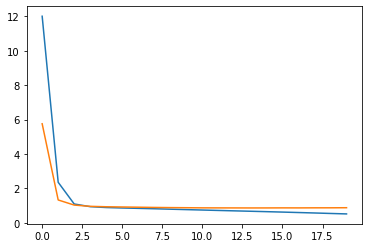

In [15]:
import matplotlib.pyplot as plt

losses = pd.DataFrame(history.history)
plt.plot(losses)

In [16]:
#evaluasi model
model.evaluate([data_test.movie_id, data_test.user_id], data_test.user_rating)

625/625 [==============================] - 1s 964us/step - loss: 0.8818


0.8818342089653015

### Simpan Model

simpan model dengan format .h5

In [17]:
#model.save('model.h5')

simpan model dengan format .json
jika gagal, coba jalankan di google colaboratory

In [ ]:
'''
from zipfile import ZipFile
import os

with ZipFile('tfjs_model.zip', 'w') as z:
  for filename in os.listdir('tfjs_model'): 
    filepath = os.path.join('tfjs_model', filename)
    z.write(filepath)
'''

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def get_recommendations(user_id, movies, model):
  movies = movies.copy()
  user_ids = np.array([user_id] * len(movies))
  results = model([movies.movie_id.values, user_ids]).numpy().reshape(-1)

  movies['predicted_rating'] = pd.Series(results)
  movies = movies.sort_values('predicted_rating', ascending=False)

  print(f'Recommendations for user {user_id}')
  return movies

get_recommendations(9, movies, model)

Recommendations for user 9


,movie_id,movie_title,movie_genres_str,predicted_rating
1448,1449,Pather Panchali (1955),['Documentary'],5.525826
1641,1642,Some Mother's Son (1996),['Documentary'],5.504597
1063,1064,Crossfire (1947),"['Comedy', 'Fantasy']",5.377784
1404,1405,Boy's Life 2 (1997),['Documentary'],5.373611
188,189,"Grand Day Out, A (1992)","['Adventure', ""Children's""]",5.335051
...,...,...,...,...
1576,1577,"Death in the Garden (Mort en ce jardin, La) (1...",['Documentary'],-0.074847
1525,1526,Witness (1985),"['Documentary', 'Romance', 'Thriller']",-0.084161
1234,1235,"Big Bang Theory, The (1994)",['Comedy'],-0.095195
1308,1309,"Very Natural Thing, A (1974)",['Documentary'],-0.147105
